# **T1 - Teste 1 - Estatística Descritiva - Análise Exploratória de Dados**

**Nomes dos integrantes do Grupo**

In [ ]:
# Membro 1: Gabriel de Antônio Mazetto - RA: 22008601
# Membro 2: Gabriel Cândido - RA: 23005724
# Membro 3: Mateus Pereira Alves - RA: 22004168

**Importando o dataset diamonds com a biblioteca Seaborn**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

diamonds = sns.load_dataset("diamonds")
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# **Desenvolvimento das análises**

## - Análises iniciais do dataset

- Entendendo o dataset

O dataset "diamonds" está composto por 53940 amostras de diamantes, contendo os seguintes atributos: "carat" (que está relacionado com o peso do diamante em quilates), "cut" (que se refere à qualidade de seu corte), "color", "clarity" (uma medida da clareza do diamante), "depth" (a profundidade do diamante em porcentagem da largura média), "table" (largura da mesa do diamante como uma porcentagem da largura média), "price" (preço em dólares americanos) e suas medidas em mm de x, y e z (comprimento, largura e profundidade respectivamente).



In [ ]:
#Como foi encontrado diamantes com dimensões iguais a 0, foi feito uma filtragem antes de seguir com a análise dos dados.
diamonds = diamonds[diamonds.x != 0]
diamonds = diamonds[diamonds.y != 0]
diamonds = diamonds[diamonds.z != 0]

In [ ]:
diamonds.describe().round(3)

,carat,depth,table,price,x,y,z
count,53920.000,53920.000,53920.000,53920.000,53920.000,53920.000,53920.000
mean,0.798,61.750,57.457,3930.993,5.732,5.735,3.540
std,0.474,1.432,2.234,3987.280,1.119,1.140,0.703
min,0.200,43.000,43.000,326.000,3.730,3.680,1.070
25%,0.400,61.000,56.000,949.000,4.710,4.720,2.910
50%,0.700,61.800,57.000,2401.000,5.700,5.710,3.530
75%,1.040,62.500,59.000,5323.250,6.540,6.540,4.040
max,5.010,79.000,95.000,18823.000,10.740,58.900,31.800


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

- Mediana:

A mediana é uma medida de tendência central que representa o valor no centro de um conjunto de dados quando eles são ordenados em ordem crescente ou decrescente. Ao contrário da média, a mediana não é influenciada por valores extremos, tornando-se uma medida confiável da posição central dos dados. No contexto dos diamantes, podemos perceber que 50% deles foram avaliados em um preço abaixo de $2401,00 dolares.

In [ ]:
mediana_price = diamonds.price.median()
mediana_quilates = diamonds.carat.median()
print("50% dos diamantes possuem um preço de até:", mediana_price)
print("50% dos diamantes possuem um quilate de até:", mediana_quilates)

50% dos diamantes possuem um preço de até: 2401.0
50% dos diamantes possuem um quilate de até: 0.7


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


- Percentis:

Os percentis são valores que dividem o conjunto de dados a partir de uma determinada porcentagem. Podemos ver que 95% dos diamantes foram vendidos a um preço abaixo de $13097,05 dólares.

In [ ]:
Q1 = diamonds.price.quantile(q=0.25)
print("25% dos diamantes possuem preço de até", Q1)
Q3 = diamonds.price.quantile(q=0.75)
print("75% dos diamantes possuem preço de até", Q3)
P95 = diamonds.price.quantile(q=0.95)
print("Apenas 5% dos diamantes possuem preço maior que", P95.round(2))
P99 = diamonds.price.quantile(q=0.99)
print("Apenas 1% dos diamantes possuem preço maior que", P99.round(2))

25% dos diamantes possuem preço de até 949.0
75% dos diamantes possuem preço de até 5323.25
Apenas 5% dos diamantes possuem preço maior que 13097.05
Apenas 1% dos diamantes possuem preço maior que 17365.809999999998


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

- Média Aparada:

A média aparada é uma medida de tendência central que é calculada excluindo os outliers (valores extremos) de um conjunto de dados. A média aparada é útil quando há valores extremos que afetam a média de forma significativa. No conjunto de dados vemos que a média aparada de preços dos diamantes ficaram em torno de $2300,00 dólares.


In [ ]:
media = diamonds.price.mean()
s = diamonds.price.std()

linf = media - 3*s
lsup = media + 3*s

AmostraAparada = diamonds[diamonds.price>=linf]
AmostraAparada = diamonds[diamonds.price<=lsup]
media_aparada = AmostraAparada.price.median()
print("Media Aparada do preço dos diamantes:", media_aparada)

Media Aparada do preço dos diamantes: 2330.5


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

- Desvio Padrão:

O desvio padrão é uma medida de dispersão que indica o quanto os dados estão espalhados em relação à média. Um desvio padrão alto indica que os dados estão mais dispersos, enquanto um desvio padrão baixo indica que os dados estão mais concentrados em torno da média. O desvio padrão é uma medida útil para entender a variabilidade dos dados e identificar quais valores são considerados outliers. Na base de dados dos diamantes o desvio padrão foi de $3987,28, indicando que o preço de um diamante tem uma variabilidade muito grande, dependendo sempre de diversos fatores para ter ou não um preço elevado.

In [ ]:
desvio_padrao = diamonds.price.std()
print("Desvio Padrão do preço dos diamantes:", desvio_padrao.round(2))

Desvio Padrão do preço dos diamantes: 3987.28


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

- Coeficiente de Correlação Linear de Pearson:

O Coeficiente de Correlação Linear de Pearson é uma medida de associação entre duas variáveis numéricas que indica a força e a direção da relação linear entre elas. O coeficiente varia de -1 a 1, onde valores próximos a -1 indicam uma relação negativa perfeita, valores próximos a 1 indicam uma relação positiva perfeita e valores próximos a 0 indicam uma relação fraca ou nenhuma relação. Em geral, podemos considerar que existe uma relação linear forte quando o coeficiente estiver acima de 0.8. O coeficiente encontrado entre o preço e o quilate foi de 0.9216, indicando que, em geral, quanto maior for o quilate, maior será o preço do diamante.

In [ ]:
r = linregress(x=diamonds.carat, y = diamonds.price).rvalue
print("Coeficiente de Correlação Linear de Pearson:", r.round(4))

Coeficiente de Correlação Linear de Pearson: 0.9216


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

- Coeficiente de Determinação(R2):

 O Coeficiente de Determinação é uma medida de quanto a variação de uma característica é explicada pela variação de outra. O coeficiente varia de 0 a 1, onde valores próximos a 1 indicam que uma grande proporção da variação é explicada pela relação entre as variáveis e valores próximos a 0 indicam que a relação é fraca ou inexistente. O coeficiente de determinação é útil para entender a força da relação entre as variáveis e para fazer previsões com base em modelos de regressão. Podemos ver que a variável "carat" explica 84,93% do preço final que o diamante terá.

In [ ]:
R2 = r**2
print("Coeficiente de Determinação:", R2.round(4))

Coeficiente de Determinação: 0.8493


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

- Análise dos Histogramas:

  Aqui podemos perceber pelo histograma que os dados seguem uma exponencial decrescente ao usar o "price" como valor de entrada. Isso mostra que ao aumentar um pouco o preço do diamante, a quantidade diminuirá drasticamente. Além de ficar claro que o corte do tipo "Ideal" é muito mais procurado do que os demais.

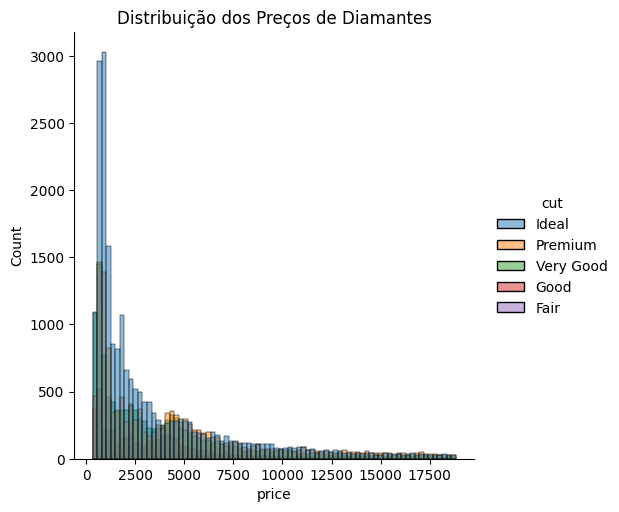

In [ ]:
sns.displot(data=diamonds, x = "price", hue = "cut")
plt.title("Distribuição dos Preços de Diamantes")
plt.show()

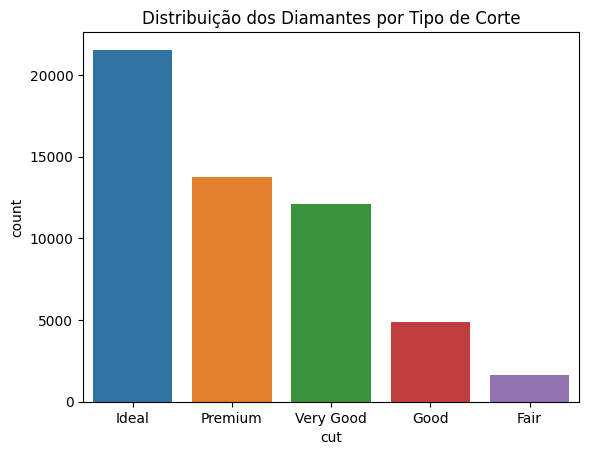

In [ ]:
sns.countplot(data=diamonds, x = "cut")
plt.title("Distribuição dos Diamantes por Tipo de Corte")
plt.show()

-------------------------------------------------------------------------------------

## - Análise da influência das variáveis categóricas sobre o preço

### - Influência do corte no preço

- Ao analisar o boxplot do preço em cada tipo de corte, percebemos algo aparentemente incomum, visto que o corte do tipo "Ideal" (que deveria deixar o diamante visualmente mais bonito), em geral, possui um preço menor do que os diamantes que possuem um corte "Fair" (que deixa o diamante um pouco mais bruto). Realisando uma segunda análise, dessa vez do peso em quilates do diamante separado pelo corte, notamos que o corte "Ideal", pelo processo de lapidação, retira uma parte maior do diamante do que o corte "Fair", ou seja, os quilates do diamante possui uma influência superior à qualidade do corte na questão do preço.

Text(0.5, 1.0, 'Distribuição do Preço dos Diamantes por Tipo de Corte')

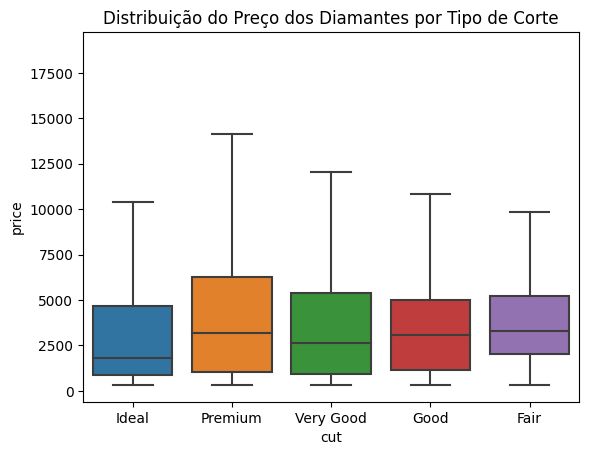

In [ ]:
sns.boxplot(data=diamonds, x="cut", y="price", fliersize=0)
plt.title("Distribuição do Preço dos Diamantes por Tipo de Corte")

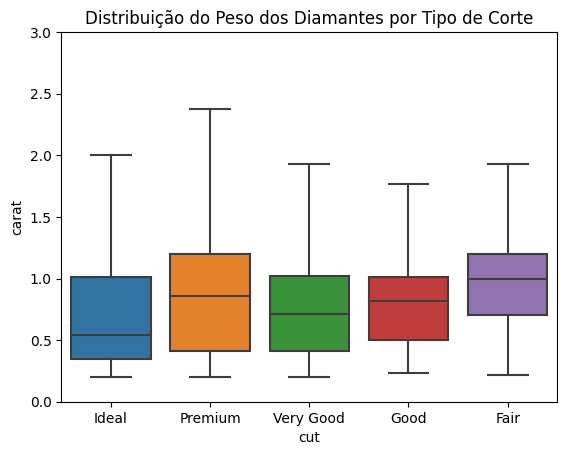

In [ ]:
#O boxplot do corte (x) e quilates (y) segue o mesmo padrão que o de cima.
sns.boxplot(data=diamonds, x="cut", y="carat", fliersize=0)
plt.title("Distribuição do Peso dos Diamantes por Tipo de Corte")
plt.ylim(0, 3)
plt.show()

In [ ]:
# O peso em quilates dos diamantes aumenta conforme se diminui a qualidade do corte.
grouped = diamonds.groupby('cut')
grouped['carat'].describe()

,count,mean,std,min,25%,50%,75%,max
cut,,,,,,,,
Ideal,21548.0,0.702759,0.432849,0.20,0.35,0.540,1.01,3.50
Premium,13780.0,0.891409,0.514864,0.20,0.41,0.855,1.20,4.01
Very Good,12081.0,0.806365,0.459451,0.20,0.41,0.710,1.02,4.00
Good,4902.0,0.848711,0.453280,0.23,0.50,0.820,1.01,3.01
Fair,1609.0,1.046078,0.516560,0.22,0.70,1.000,1.20,5.01


----------------------------------------------------------------------------------------------

### - Influência da cor no preço

In [ ]:
#O peso em quilates aumenta conforme diminui a qualidade da cor.
grouped = AmostraAparada.groupby('color')
grouped['carat'].describe()

,count,mean,std,min,25%,50%,75%,max
color,,,,,,,,
D,6691.0,0.645129,0.339765,0.20,0.36,0.53,0.90,2.75
E,9683.0,0.644072,0.346539,0.20,0.36,0.53,0.90,3.05
F,9363.0,0.715740,0.369156,0.20,0.40,0.70,1.01,3.01
G,11047.0,0.746610,0.412084,0.23,0.38,0.67,1.03,3.01
H,8044.0,0.872893,0.479888,0.23,0.41,0.90,1.17,3.65
I,5170.0,0.970689,0.529533,0.23,0.50,0.92,1.29,4.01
J,2716.0,1.118645,0.550639,0.23,0.70,1.08,1.51,4.01


In [ ]:
#Aqui podemos ver que proporcionalmente existem mais diamantes com a pior cor do que com a melhor cor no corte "Fair" do que no corte "Ideal".
#Essa maior concentração deveria diminuir a média de preço dos diamantes com corte "Fair", porém isso não ocorre.
count_Ideal_D = diamonds[(diamonds.cut == "Ideal") & (diamonds.color == "D")].count()[0]
count_Ideal_J = diamonds[(diamonds.cut == "Ideal") & (diamonds.color == "J")].count()[0]
count_Fair_D = diamonds[(diamonds.cut == "Fair") & (diamonds.color == "D")].count()[0]
count_Fair_J = diamonds[(diamonds.cut == "Fair") & (diamonds.color == "J")].count()[0]
prop1 = count_Ideal_J/count_Ideal_D
prop2 = count_Fair_J/count_Fair_D
print("Proporção entre diamantes do tipo 'Ideal' na cor 'J' e aqueles na cor 'D':", prop1.round(2))
print("Proporção entre diamantes do tipo 'Fair' na cor 'J' e aqueles na cor 'D':", prop2.round(2))

Proporção entre diamantes do tipo 'Ideal' na cor 'J' e aqueles na cor 'D': 0.31616090331686664
Proporção entre diamantes do tipo 'Fair' na cor 'J' e aqueles na cor 'D': 0.7300613496932515


----------------------------------------------------------------------------------------------------------------------------------------------------------------


- Podemos perceber através da análise dos boxplots e de outros indicativos estatísticos que o peso em quilates dos diamantes são inversamente proporcionais a qualidade de sua cor. Isto pode ocorrer pelo fato de que, ao se deparar com um diamante com uma cor melhor, espera-se que se tenha um maior cuidado para deixa-lo mais bonito e seja realizado nele um corte do tipo "Ideal" ou algo próximo. Consequentemente, o diamante perderá um pouco de seu peso em quilates e passará, em geral, a valer um pouco menos.
Isso explica o motivo pelo qual a cor considerada como melhor ("D") possui um preço menor do que as demais.

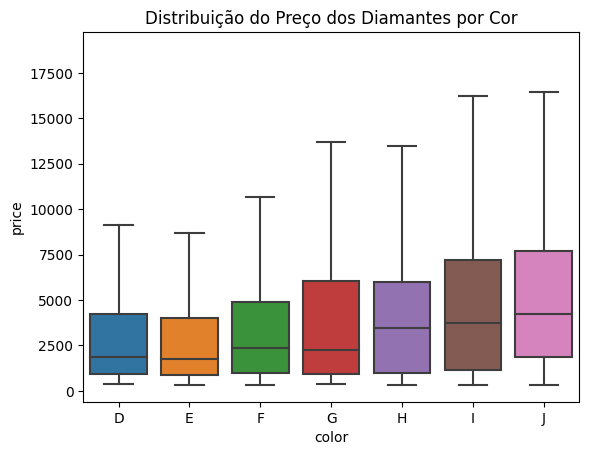

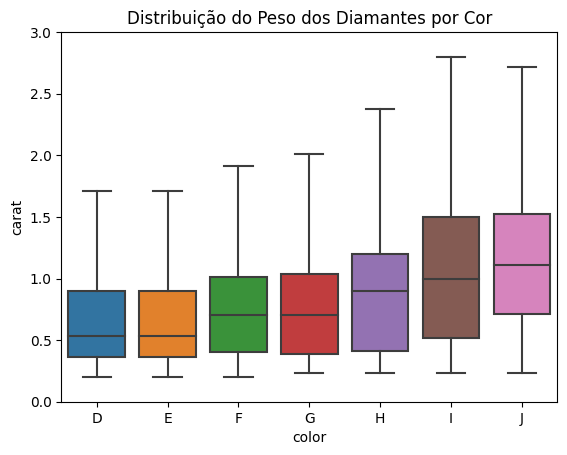

In [ ]:
sns.boxplot(data=diamonds, x="color", y="price", fliersize=0)
plt.title("Distribuição do Preço dos Diamantes por Cor")
plt.show()
print("\n")
sns.boxplot(data=diamonds, x="color", y="carat", fliersize=0)
plt.title("Distribuição do Peso dos Diamantes por Cor")
plt.ylim(0, 3)
plt.show()

------------------------------------------------------------------------------------------

### - Influência da claridade no preço

- Aqui ocorre a mesma coisa que na análise acima, em que uma maior claridade gera um maior tratamento no corte e consequentemente um menor peso em quilates. Em geral, percebemos que diamantes com qualidades ruins possuem um preço mais elevado.

Text(0.5, 1.0, 'Distribuição do Preço dos Diamantes por Claridade')

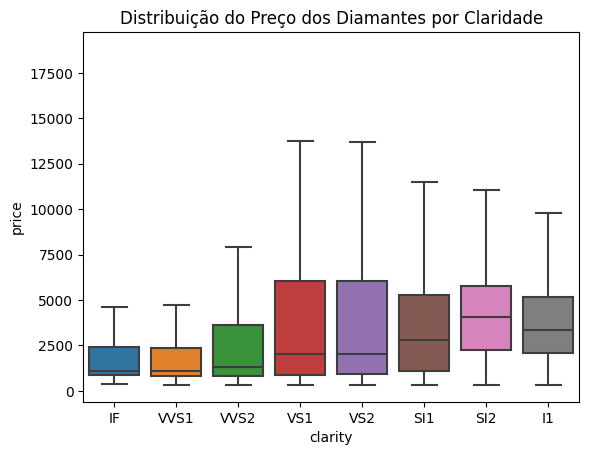

In [ ]:
sns.boxplot(data=diamonds, x="clarity", y="price", fliersize=0)
plt.title("Distribuição do Preço dos Diamantes por Claridade")

In [ ]:
#O preço aumenta conforme diminui a claridade.
grouped = diamonds.groupby('clarity')
grouped['price'].describe()

,count,mean,std,min,25%,50%,75%,max
clarity,,,,,,,,
IF,1790.0,2864.839106,3920.248499,369.0,895.00,1080.0,2388.50,18806.0
VVS1,3654.0,2519.512315,3328.175459,336.0,816.00,1092.5,2376.00,18777.0
VVS2,5066.0,3283.737071,3821.647537,336.0,794.25,1311.0,3638.25,18768.0
VS1,8170.0,3839.144308,4011.894939,327.0,876.00,2005.0,6021.00,18795.0
VS2,12254.0,3922.866819,4040.065223,334.0,900.00,2052.0,6022.75,18823.0
SI1,13063.0,3994.112608,3796.689858,326.0,1089.00,2822.0,5249.50,18818.0
SI2,9185.0,5060.440174,4256.944654,326.0,2264.00,4072.0,5775.00,18804.0
I1,738.0,3926.189702,2811.615917,345.0,2071.00,3346.0,5167.75,18531.0


In [ ]:
#O peso em quilates aumenta conforme diminui a claridade.
grouped = diamonds.groupby('clarity')
grouped['carat'].describe()

,count,mean,std,min,25%,50%,75%,max
clarity,,,,,,,,
IF,1790.0,0.505123,0.313433,0.23,0.31,0.350,0.55,2.29
VVS1,3654.0,0.503131,0.299376,0.23,0.31,0.390,0.56,2.31
VVS2,5066.0,0.596202,0.359697,0.23,0.32,0.440,0.73,2.07
VS1,8170.0,0.727108,0.423531,0.23,0.38,0.570,1.01,2.59
VS2,12254.0,0.763716,0.446144,0.20,0.38,0.630,1.02,3.51
SI1,13063.0,0.850272,0.449364,0.21,0.50,0.760,1.06,2.57
SI2,9185.0,1.077308,0.516291,0.20,0.72,1.010,1.26,3.04
I1,738.0,1.284146,0.633563,0.30,0.96,1.115,1.51,5.01


## - Análise da correlação entre a variável price e as demais variáveis numéricas

In [ ]:
#Matriz de correlação de diamonds.
diamonds.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048
depth,0.028259,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023
table,0.181646,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483
price,0.921592,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206
x,0.977779,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435
y,0.953991,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744
z,0.961048,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000


### - Correlação entre price e carat

- O gráfico abaixo mostra a relação entre o preço e o tamanho dos diamantes. Quanto maior o quilate do diamante, maior será o seu preço. Podemos ver essa relação como se formase de uma linha diagonal no gráfico, o que é a chamada de "reta de regressão". Além disso, é importante notar que o aumento do preço está, visualmente, se aproximando de uma curva exponencial.

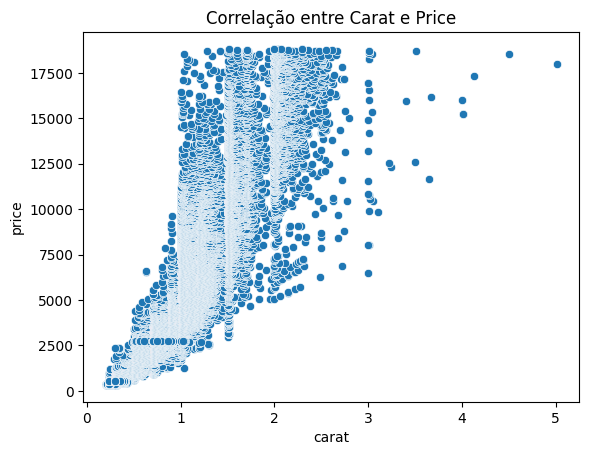


Coeficiente de Correlação Linear:
 r =  0.9216


In [ ]:
sns.scatterplot(data=diamonds, x="carat", y = "price")
plt.title("Correlação entre Carat e Price")
plt.show()
r = linregress(x=diamonds.carat, y = diamonds.price).rvalue
print("\nCoeficiente de Correlação Linear:\n r = ", r.round(4))

### - Correlação entre price e depth

- No gráfico, podemos notar que a profundidade total do diamante não tem uma grande influência no seu preço. Podemos observar isso pois, independentemente da profundidade do diamante, o preço se mantém quase o mesmo, formando o que parece ser um retângulo na vertical no meio do gráfico. Isso significa que a variação no preço dos diamantes com base na sua profundidade é mínima, ou seja, a profundidade do diamante não é um fator decisivo na determinação do seu preço. O gráfico mostra que há uma estabilidade no preço (eixo y) em relação à profundidade (eixo x) dos diamantes, indicando que não há muita mudança no valor dos diamantes com base na sua profundidade.

- A confirmação de que o preço não é linearmente influenciado pela profundidade pode ser vista ao analisar o Coeficiente de Correlação Linear de Pearson representado pela variável r.

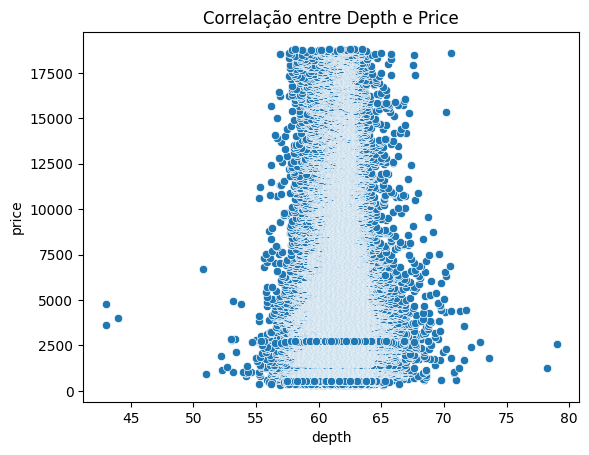


Coeficiente de Correlação Linear:
 r =  -0.0107


In [ ]:
sns.scatterplot(data=diamonds, x="depth", y = "price")
plt.title("Correlação entre Depth e Price")
plt.show()
r = linregress(x=diamonds.depth, y = diamonds.price).rvalue
print("\nCoeficiente de Correlação Linear:\n r = ", r.round(4))

### - Correlação entre price e table

- Como no gráfico anterior, o parâmetro "table" não possui quase nenhuma relação com o preço do diamante, e também possui o mesmo formato de um retângulo vertical no gráfico, além de também possuir uma confirmação de que o preço não é linearmente influenciado pelo parâmetro "table", sendo essa a análise do Coeficiente de Correlação Linear de Pearson representado pela variável r.

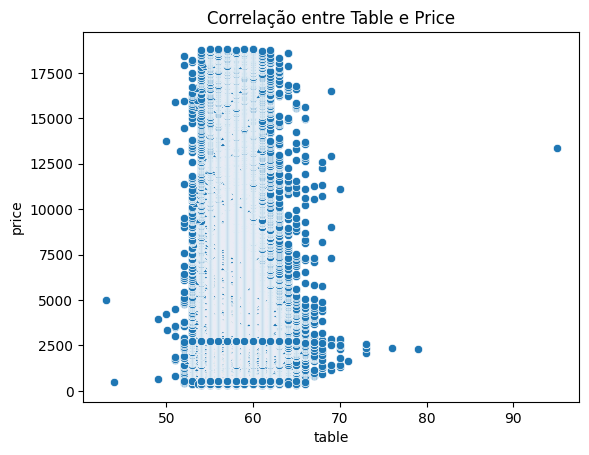


Coeficiente de Correlação Linear:
 r =  0.1272


In [ ]:
sns.scatterplot(data=diamonds, x="table", y = "price")
plt.title("Correlação entre Table e Price")
plt.show()
r = linregress(x=diamonds.table, y = diamonds.price).rvalue
print("\nCoeficiente de Correlação Linear:\n r = ", r.round(4))

### - Correlação entre price e length

- Em uma análise inicial o gráfico abaixo parece nos apresentar uma relação exponencial entre os eixos X (comprimento do diamante) e Y (preço do diamante), vendo que quanto maior o comprimento do diamante maior o seu preço, mas ao analisar o Coeficiente de Correlação Linear de Pearson nós podemos ver que que ele se assemelha mais a uma reta.

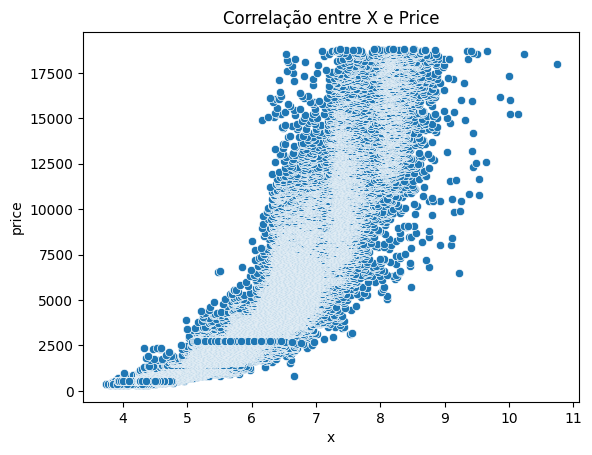


Coeficiente de Correlação Linear:
 r =  0.8872


In [ ]:
sns.scatterplot(data=diamonds, x="x", y = "price")
plt.title("Correlação entre X e Price")
plt.show()
r = linregress(x=diamonds.x, y = diamonds.price).rvalue
print("\nCoeficiente de Correlação Linear:\n r = ", r.round(4))

### - Correlação entre price e as demais dimensões do diamante (y e z)

- Nos gráficos abaixo, percebe-se que tanto a variável y (width) quanto a variavel z (depth) demonstram uma correlação linear com o a variável price, corroborando com a ideia de que quanto maior o diamante em qualquer uma de suas dimensões, maior será o seu preço.

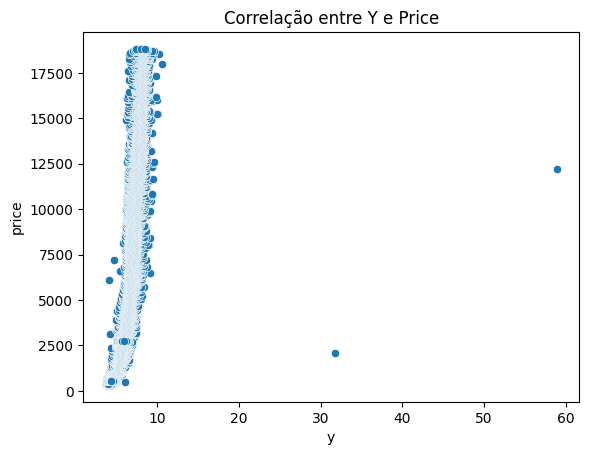


Coeficiente de Correlação Linear:
 r =  0.8679




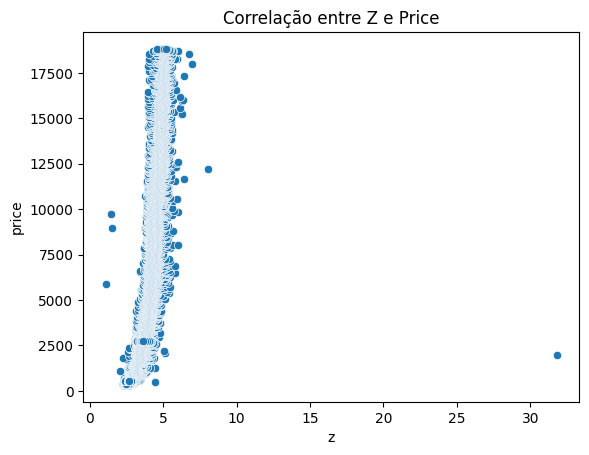


Coeficiente de Correlação Linear:
 r =  0.8682


In [ ]:
sns.scatterplot(data=diamonds, x="y", y = "price")
plt.title("Correlação entre Y e Price")
plt.show()
r = linregress(x=diamonds.y, y = diamonds.price).rvalue
print("\nCoeficiente de Correlação Linear:\n r = ", r.round(4))
print("\n")
sns.scatterplot(data=diamonds, x="z", y = "price")
plt.title("Correlação entre Z e Price")
plt.show()
r = linregress(x=diamonds.z, y = diamonds.price).rvalue
print("\nCoeficiente de Correlação Linear:\n r = ", r.round(4))

# **- CONCLUSÃO**

###- Após todas as análises exploratórias feitas, conseguimos chegar a algumas conclusão, sendo elas:




- Notamos que metade dos diamante possuem menos de 1 quilate e apresentam um preço de até U$2400.00 dolares, o que corresponde a aproximadamente 13% do maior valor encontrado na base de dados.

- Reparamos que cortes do tipo Ideal ocorrem com uma frêquência maior do que os demais cortes. Isso ocorre pelo fato desse corte deixar o diamante mais atrativo para os clientes, gerando uma demanda maior do produto.

- Ao analisar a relação das variáveis categóricas no preço do diamante, reparamos que, em geral, diamantes que possuem características consideradas ruins apresentam um maior peso em quilates e consequentemente preços mais elevados do que aqueles que possuem características mais desejadas.

- Ao observar os gráficos de correlação linear entre as variáveis numéricas e a variável price, concluimos que o fator que mais impacta no preço de um diamante é o seu peso em quilates, juntamente com as suas dimensões (x, y e z). Isso pôde ser confirmado pelos valores dos Coeficientes de Correlação Linear de Pearson.